In [1]:
import geopandas as gpd
import osmnx as ox
import momepy

In [49]:
hghway = gpd.read_file("data/oregon_highways.shp")
graph = momepy.gdf_to_nx(hghway, approach="primal", directed=True)

In [50]:
nodes, edges = momepy.nx_to_gdf(graph)

In [55]:
nodes['x'] = nodes['geometry'].x
nodes['y'] = nodes['geometry'].y

In [60]:
edges['u'] = edges['node_start']
edges['v'] = edges['node_end']
edges['key'] = 0

In [61]:
edges = edges.set_index(['u', 'v', 'key'])
edges = edges[['HWYNAME','mm_len', 'geometry']]
edges = edges.rename(columns={"HWYNAME": "name", "mm_len": "length"})

In [62]:
test = ox.graph_from_gdfs(nodes, edges)

In [63]:
ox.save_graphml(test, './data/graph.graphml')
graph = ox.load_graphml('./data/graph.graphml')

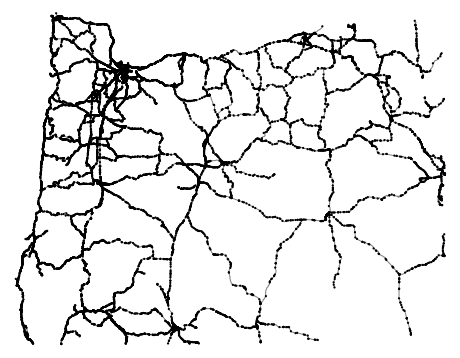

In [65]:
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [80]:
nx.info(graph)

'MultiDiGraph with 19793 nodes and 21209 edges'

In [95]:
nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [105]:
edges

name       length  \
u     v     key                                            
0     1     0    CABIN CREEK S.R.A. CONN #1   172.406720   
1     4     0                       PACIFIC  4982.726110   
4     5     0       S RICE HILL CONN. NO. 1   280.416603   
      6     0                       PACIFIC   544.493808   
2     3     0    CABIN CREEK S.R.A. CONN SB   598.733928   
...                                     ...          ...   
19778 1653  0            BEAVERTON-TUALATIN   130.808119   
19786 19787 0                  PAYETTE SPUR   120.385260   
19788 19777 0    E. MCMINNVILLE FRONTAGE RD   188.489199   
19789 19788 0    E. MCMINNVILLE FRONTAGE RD   644.958312   
19791 19792 0    FOOTHILL BLVD. FRONTAGE RD   719.563780   

                                                          geometry  max_speed  
u     v     key                                                                
0     1     0    LINESTRING (474471.652 4813047.859, 474471.427...         70  
1     4     0    LINESTRING (474446.660 4813218.049, 474441.478...         70  
4     5     0    LINESTRING (474465.724 4817570.071, 474512.294...         70  
      6     0    LINESTRING (474465.724 4817570.071, 474513.674...         70  
2     3     0    LINESTRING (473978.437 4814030.307, 474006.883...         70  
...                                                            ...        ...  
19778 1653  0    LINESTRING (518332.829 5029748.189, 518337.248...         70  
19786 19787 0    LINESTRING (985004.427 4900450.786, 985086.134...         70  
19788 19777 0    LINESTRING (486748.068 5005299.982, 486771.797...         70  
19789 19788 0    LINESTRING (486103.496 5005312.082, 486130.563...         70  
19791 19792 0    LINESTRING (475494.479 4697925.169, 475608.321...         70  

[21209 rows x 4 columns]

In [88]:
list(list(graph.edges(data=True))[0][-1].keys())

['name', 'length', 'geometry']

In [89]:
for u, v, data in graph.edges.data():
    data['max_speed'] = 70

In [90]:
list(list(graph.edges(data=True))[0][-1].keys())

['name', 'length', 'geometry', 'max_speed']

In [94]:
list(graph.edges.data())[0]

(0,
 1,
 {'name': 'CABIN CREEK S.R.A. CONN #1',
  'length': 172.40672049682195,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fa6adec0dc0>,
  'max_speed': 70})